<a href="https://colab.research.google.com/github/Priyo-prog/Machine-Learning/blob/main/Decision%20Tree/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

* In this lesson we are going to use **scikit-learn** and **Cost-Complexity Pruning** to build the Classification tree.
* **Classification Trees** are exceptionally useful machine learning method when you need to know how the decisions are being made.


## Import libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Import the data

* We are goin to load the dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) . Specifically we are going to use [Heart Disease Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data). This dataset will allow us to predict if someone has heart disease based ojn their age, sex, blood pressure and variety of other metrics.

* We need to replace the column numbers with the following column names:
 * age 
 * sex 
 * cp, chest pain
 * restbp, resting blood pressure (in mm Hg)
 * fbs, fasting blood sugar
 * restecg, resting electrocardiographic results
 * thalac, maximum heart rate achieved
 * exang, exercise induced angina
 * oldpeak, ST depression induced by exercise relative to rest 
 * slope, the slope of the peak exercise ST segment
 * ca, number of major vessels (0-3) colored by fluroscopy
 * thal, this is short of thalium heart scan
 * hd, diagnosis of heart disease, the predicted attribute

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
## Change the column numbers to column names
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()              

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Missing Data Part 1 : Identifying missing data

This part will involve the process of identifying and dealing with **Missing Data**.

**Missing Data** is simply a blank space, or a surrogate value like **NA**, that indicates that we failed to collect data for one of the features.

There are two main ways to deal with missing data:
1. We can remove the rows that contain missing data from the dataset. This is relatively easy to do, but it wastes all other values that we collected.

2. We can **impute** the values that are missing. In this context **impute** is just a fancy way of saying "we can make an educated guess about what the value should be".


In [4]:
## dtypes tell us the "data type" for each column
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

We can see that they are almost all float64, however columns like **ca** and **thal** have object type and one column , **hd** has int64.

Object datatypes are used when there are mixture of things, like a mixture of numbers and letters. 

In [5]:
# print out unique values in the column called 'ca'
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

## Missing Data Part 2 : Dealing with missing data

Since scikit-learn classification trees do not support datasets with missing values, we need to figure out what to do these question marks. We can either delete these patients from the training dataset, or impute values for the missing data.

In [6]:
## print the number of rows that contain missing values
##
## loc[], short for "location", let's us specify which rows we want..
## and so we say we want any row with '?' in column 'ca'
## OR
## any row with '?' in column 'thal'
##
## 'len' short for "length", prints out the number of rows
len(df.loc[(df['ca']=='?')
            |
           (df['thal']=='?')])

6

Since only 6 rows have missing values, let's look at them

In [7]:
df.loc[(df['ca']=='?')
            |
           (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Let's count the number of rows in full dataset

In [8]:
len(df)

303

So 6 of **303** rows, or **2%** contain missing values. Since **303 - 6 = 297**, and **297** is plenty of data to build classification tree, we will remove the rows with missing values, rather than try to impute their values.

In [9]:
## use loc[] to select all the rows that do not contain missing values 
## annd save them in a new dataframe called "df_no_missing"
df_no_missing = df.loc[(df['ca'] != '?')
                       & 
                       (df['thal'] != '?')]

In [10]:
len(df_no_missing)

297

In [11]:
df_no_missing['ca'].unique(), df_no_missing['thal'].unique()

(array(['0.0', '3.0', '2.0', '1.0'], dtype=object),
 array(['6.0', '3.0', '7.0'], dtype=object))

## Format Data Part 1 : Split the data into features and labels

In [12]:
## make a new copy of the columns used to make predictions
X = df_no_missing.drop('hd', axis=1).copy() # alternatively df_no_missing[:, :-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [13]:
## Make a new column of the data we want to predict
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## Format the Data Part 2 : One-Hot Encoding

Now that we have split the dataframe into two pieces, X, which containst the data we will use to predict classifications, and y, which contains the known classifications in our training dataset, we need to take a closer look at the variable X. the list below tells us what each variable represents and the type of data(float or categorical) it should contain:

* **age**, **Float**

* **sex - Category**
  * 0 = female
  * 1 = male

* **cp**, cheat pain, **Category**
 * 1 = typical angina
 * 2 = atypical angina
 * 3 = non-anginal pain
 * 4 = asymptomatic

* **restbp**, resting blood pressure(in mm Hg), **Float**

* **chol**, serum cholestrol in mg/dl, **Float**

* **fbs**, fasting blood sugar, **Category**
 * 0 =>=120 mg/dl
 * 1 =<120 mg/dl

* **restecg**, resting electrocardiographic result, **Category**






In [14]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

At this point you may be wondering "what is wrong with treating categorical data like continuous data ?". To answer that question, let's look at an example

For **cp**(chest pain) column we have 4 options:
1. typical angina
2. atypical angina
3. non-anginal pain
4. asymptomatic

If we treated these values, 1,2,3 and 4, like continuous data, then we would assume that 4, which means "asymptomatic", is more similar to 3, which means "non-anginal pain", than it is to 1 or2. that means decision tree would be more likely to cluster the patients with 4s and 3s together than the patients with 4s and 1s together. In contrast, if we trat these numbers like categorical data, then we treat each one as separate category that is no more or less similar to any of the other categories. Thus the likelihood of clustering patients with 4s with 3s is the same as clustering 4s with 1s, and that approach is more reasonable.

In [15]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [16]:
## For this use case, we will use get_dummies() to do One-hot Encoding

pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [17]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [18]:
y.unique()

array([0, 2, 1, 3, 4])

In this use case we are only making a tree that does simple classification and only care if someone has heart disease or not, so we need to convert all numbers > 0 to 1

In [19]:
y_not_zero_index = y > 0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1
y.unique()

array([0, 1])

## Build A Preliminary Classification Tree

Now we simply split the data into **training** and **testing** set and build the tree.

In [20]:
## Split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

## Create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
model_dt = clf_dt.fit(X_train, y_train)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(0.05172413793103448, 0.375, 'exang <= 0.5\ngini = 0.

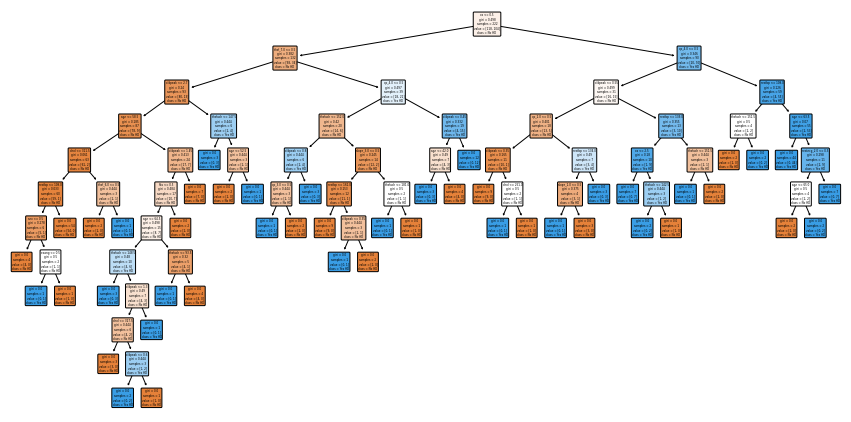

In [21]:
## Now plot the tree
plt.figure(figsize=(15, 7.5))
plot_tree(model_dt,
         filled=True,
         rounded=True,
         class_names=["No HD", "Yes HD"],
         feature_names=X_encoded.columns)

## Evaluate the Decision Tree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


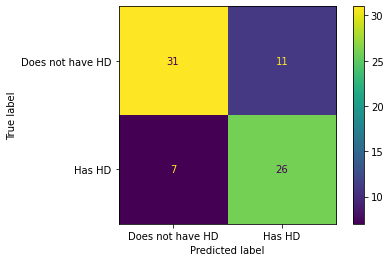

In [22]:
# plot the confusion matrix
plot_confusion_matrix(model_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

## Cost Complexity Pruning Part 1: Visualize alpha

**Decision Trees** are notorious for being **overfit** to the **Training Dataset**, and there are a lot of parameters, like max_depths and min_samples, that are designed to reduce overfitting. However, pruning a tree with **cost complexity pruning** can simplify the whole process of finding a smaller tree that improves the accuracy with the **Testing Dataset**.

First, let's extract the different values of alpha that are available for this tree and build a pruned tree for each value for alpha. We ommit the maximum value for alpha with ccp_alphas = ccp_alphas[:,-1] because it would prune all leaves, leaving us with only root instead of a tree.

In [23]:
path = model_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train, y_train)
  clf_dts.append(clf_dt) 

Now let's graph the accuracy of the trees using the **Training Dataset** and **Testing Dataset** as a function of alpha.

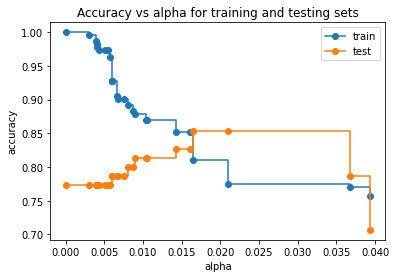

In [24]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the **Testing Dataset** hits his maximum value when alpha is about **0.016**. After this value for alpha, the accuracy of the **Training Dataset** drops off and that suggests we should set **ccp_alpha=0.016**.

**Note:** When we apply Cost Complexity Pruning  to a Classification Tree, values for alpha goes from 0 to 1, because GINI scores go from 0 to 1. In contrast, values for alpha for a Regression Tree can be much larger since the sum of the sqaured residuals can, in theory go from 0 to positive infinity.

## Cost Complexity Pruning Part 2 : Cross Validation For Finding the Best Alpha

Since there are many ways we could have divided the original dataset into **Training** and **Testing** Dataset and how do we know we used the best **Training Dataset** and **Testing Dataset** ? Typically we answer the question with **10-Fold Cross Validation**. So that's what we are going to do now, and we will do it with the **cross_val_score()** function.


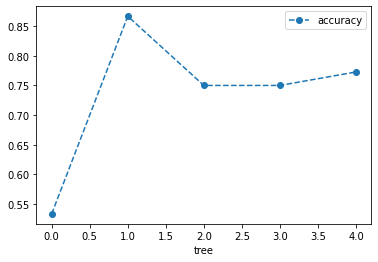

In [25]:
## The graph that we drew suggested one value for alpha, 0.016 but another set of data might suggest another optimal value

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) # creat the tree with ccp_alpha=0.016

## now use 5-fold cross validation create 5 different training and testing dataset 
## that are then used to train and test the tree.
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The graph above shows that using different **Training** and **Testing** data with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to datasets. So, instead of picking a single testing dataset, let's use **cross-validation** to find the optimal value for ccp_alpha.

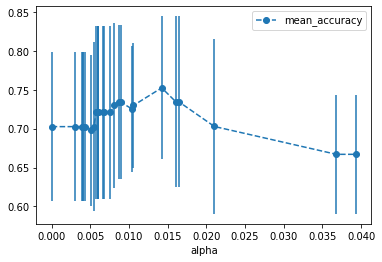

In [39]:
##from pandas.core.common import random_state
## create an array to store the results of each fold during cross-validation
alpha_loop_values = []

## for each candidate value for alpha, we will run 5-fold cross validation.
## then we will store the mean and standard deviation oof the scores (the accuracy) for each call
## to cross_val_score in alpha loop values
for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x="alpha",
                   y="mean_accuracy",
                   yerr='std',
                   marker='o',
                   linestyle='--')  

Using cross validation we can see that, overall instead of setting ccp_alpha=0.016, we need to set it to something closer to **0.014**. We can find exact value with : 

In [42]:
alpha_results[(alpha_results['alpha'] > 0.014)
              &
              (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.752323,0.091956
